In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from test_notebook import compute_vals, visualize_fav_season, visualize

In [1]:
import pandas as pd

df = pd.DataFrame({'col1': [1, 2, 1, 3, 2]})
counts = df['col1'].value_counts()

for value, count in counts.items():
    print(f"Value: {value}, Count: {count}")

Value: 1, Count: 2
Value: 2, Count: 2
Value: 3, Count: 1


In [2]:
data = pd.read_csv(r"C:\Users\MY PC\Data-Science-Club\Getting_started\intro_data.csv")

In [3]:
data

,What number you received?,What is your gender?,What year are you in college?,What is your major or field of study?,What is your age group?,Are you an international student?,Column 7,Column 8,Column 9,Column 10,Column 11,Column 12,Column 13,Column 14
0,31,Male,Sophomore,CS,18-20,Yes,Hearts,Finding a job/intern,Pizza,Fall,Binge-watching a movie/TV series,10.0,Spontaneous road trip,34
1,3,Male,Junior,CS,18-20,No,Hearts,Finding a job/intern,Chocolate,Fall,Hanging out with friends,7.0,Spontaneous road trip,0
2,19,Male,Freshman,Econometrics,18-20,Yes,Diamonds,Finding a job/intern,Ramen,Winter,Playing video games,9.0,Spontaneous road trip,0
3,21,Male,Freshman,AIBA,24-26,Yes,Clubs,Failing a class,Pizza,Summer,Scrolling social media,8.0,Spontaneous road trip,0
4,47,Female,Junior,information science con/data analytics,18-20,No,Spades,Finding a job/intern,Ramen,Winter,Scrolling social media,6.0,Plan a month-long vacation,0
5,20,Male,Senior,Phyiscs,24-26,No,Clubs,Failing a class,Pizza,Fall,Binge-watching a movie/TV series,7.0,Plan a month-long vacation,0
6,22,Male,Freshman,Computer science,18-20,No,Spades,Finding a job/intern,Pizza,Fall,Scrolling social media,8.0,Plan a month-long vacation,0
7,12,Female,Sophomore,Computer Science,18-20,No,Diamonds,Failing a class,Ramen,Fall,"Binge-reading (novels, comics, etc.)",9.0,Plan a month-long vacation,0
8,10,Male,Senior,Artificial Intelligence and Business Analytics,27 and above,Yes,Spades,Public speaking,Shawarma,Winter,Scrolling social media,5.0,Spontaneous road trip,0
9,33,Male,Senior,IT,21-23,No,Spades,Finding a job/intern,Pizza,Fall,Hanging out with friends,8.0,Spontaneous road trip,0


In [4]:
cols = list(data.columns)
cols

['What number you received?',
 'What is your gender?  ',
 'What year are you in college?  ',
 'What is your major or field of study?  ',
 'What is your age group?  ',
 'Are you an international student?  ',
 'Column 7',
 'Column 8',
 'Column 9',
 'Column 10',
 'Column 11',
 'Column 12',
 'Column 13',
 'Column 14']

In [5]:
cols = list(data.columns)
rename_cols = ["id", "gender", "uni_year", "major", "age_group", "intl_or_not", "card_team","big_college_fear", 
			   "fav_food", "fav_season", "fav_past_time", "sleep_hour", "roadtrip_vs_vacation", 
			   "times_asleep_inclass"]
rename_dict = {}

for i in range(len(cols)):
	rename_dict[cols[i]] = rename_cols[i]

rename_dict

{'What number you received?': 'id',
 'What is your gender?  ': 'gender',
 'What year are you in college?  ': 'uni_year',
 'What is your major or field of study?  ': 'major',
 'What is your age group?  ': 'age_group',
 'Are you an international student?  ': 'intl_or_not',
 'Column 7': 'card_team',
 'Column 8': 'big_college_fear',
 'Column 9': 'fav_food',
 'Column 10': 'fav_season',
 'Column 11': 'fav_past_time',
 'Column 12': 'sleep_hour',
 'Column 13': 'roadtrip_vs_vacation',
 'Column 14': 'times_asleep_inclass'}

In [6]:
data.rename(columns=rename_dict, inplace=True)

In [7]:
data.head()

,id,gender,uni_year,major,age_group,intl_or_not,card_team,big_college_fear,fav_food,fav_season,fav_past_time,sleep_hour,roadtrip_vs_vacation,times_asleep_inclass
0,31,Male,Sophomore,CS,18-20,Yes,Hearts,Finding a job/intern,Pizza,Fall,Binge-watching a movie/TV series,10.0,Spontaneous road trip,34
1,3,Male,Junior,CS,18-20,No,Hearts,Finding a job/intern,Chocolate,Fall,Hanging out with friends,7.0,Spontaneous road trip,0
2,19,Male,Freshman,Econometrics,18-20,Yes,Diamonds,Finding a job/intern,Ramen,Winter,Playing video games,9.0,Spontaneous road trip,0
3,21,Male,Freshman,AIBA,24-26,Yes,Clubs,Failing a class,Pizza,Summer,Scrolling social media,8.0,Spontaneous road trip,0
4,47,Female,Junior,information science con/data analytics,18-20,No,Spades,Finding a job/intern,Ramen,Winter,Scrolling social media,6.0,Plan a month-long vacation,0


## 1. Analyze data and compute necessary values

In [8]:
data.describe()

,sleep_hour,times_asleep_inclass
count,44.000000,44.000000
mean,7.134091,1.750000
std,1.425179,5.570374
min,5.000000,0.000000
25%,6.000000,0.000000
50%,7.000000,0.000000
75%,8.000000,2.000000
max,10.000000,34.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    44 non-null     object 
 1   gender                44 non-null     object 
 2   uni_year              44 non-null     object 
 3   major                 44 non-null     object 
 4   age_group             44 non-null     object 
 5   intl_or_not           44 non-null     object 
 6   card_team             44 non-null     object 
 7   big_college_fear      44 non-null     object 
 8   fav_food              44 non-null     object 
 9   fav_season            44 non-null     object 
 10  fav_past_time         44 non-null     object 
 11  sleep_hour            44 non-null     float64
 12  roadtrip_vs_vacation  44 non-null     object 
 13  times_asleep_inclass  44 non-null     int64  
dtypes: float64(1), int64(1), object(12)
memory usage: 4.9+ KB


In [10]:
# preprocess
# other than 4 categories, replace with "Other"
data["fav_food"] = data["fav_food"].apply(lambda x: x if x in ["Chocolate", "Ramen", "Pizza", "Mac and cheese"] else "Other")

In [11]:
# modified data
data.tail()

,id,gender,uni_year,major,age_group,intl_or_not,card_team,big_college_fear,fav_food,fav_season,fav_past_time,sleep_hour,roadtrip_vs_vacation,times_asleep_inclass
39,10,Male,Senior,Artificial intelligence and business analytics,27 and above,Yes,Clubs,Public speaking,Pizza,Winter,Scrolling social media,5.0,Spontaneous road trip,0
40,19,Male,Freshman,Econometrics,18-20,Yes,Diamonds,Finding a job/intern,Ramen,Winter,Playing video games,9.0,Spontaneous road trip,0
41,45,Male,Senior,Artificial intelligence and Business Analytics,24-26,Yes,Diamonds,Finding a job/intern,Other,Winter,Hanging out with friends,5.0,Plan a month-long vacation,0
42,41,Male,Freshman,Computer Science,18-20,Yes,Spades,Finding a job/intern,Pizza,Fall,Playing video games,6.0,Spontaneous road trip,1
43,43,Male,Senior,Business Analytics and Information Systems,21-23,No,Diamonds,Finding a job/intern,Pizza,Summer,Hanging out with friends,7.0,Plan a month-long vacation,0


In [12]:
# color_list = ["red", "black"]
# color_dict = {"Diamonds": "red", "Spades": "black", "Hearts": "red", "Clubs": "black"}
card_list = list(data["card_team"].unique())
# data["card_team"] = data["card_team"].apply(lambda x: color_dict[x])

In [13]:
compute_vals(data, card=card_list, target_col="times_asleep_inclass", team_col="card_team", target_print="times asleep in class")

The average times asleep in class for team Hearts is 5.909090909090909
The minimum times asleep in class for team Hearts is 0
The maximum times asleep in class for team Hearts is 34

The average times asleep in class for team Diamonds is 0.14285714285714285
The minimum times asleep in class for team Diamonds is 0
The maximum times asleep in class for team Diamonds is 2

The average times asleep in class for team Clubs is 0.875
The minimum times asleep in class for team Clubs is 0
The maximum times asleep in class for team Clubs is 3

The average times asleep in class for team Spades is 0.2727272727272727
The minimum times asleep in class for team Spades is 0
The maximum times asleep in class for team Spades is 2



In [14]:
compute_vals(data, card=card_list, target_col="sleep_hour", team_col="card_team")

The average hours of sleep for team Hearts is 7.854545454545455
The minimum hours of sleep for team Hearts is 5.0
The maximum hours of sleep for team Hearts is 10.0

The average hours of sleep for team Diamonds is 7.0
The minimum hours of sleep for team Diamonds is 5.0
The maximum hours of sleep for team Diamonds is 9.0

The average hours of sleep for team Clubs is 7.125
The minimum hours of sleep for team Clubs is 5.0
The maximum hours of sleep for team Clubs is 9.0

The average hours of sleep for team Spades is 6.590909090909091
The minimum hours of sleep for team Spades is 5.0
The maximum hours of sleep for team Spades is 9.0



## 2. Visualize data

- Bar chart on favorite seasons

In [2]:
for i in range(1, 0):
    print(i)

In [15]:
# color_dict = {"Diamonds": "red", "Spades": "black", "Hearts": "red", "Clubs": "black"}
data.head()

,id,gender,uni_year,major,age_group,intl_or_not,card_team,big_college_fear,fav_food,fav_season,fav_past_time,sleep_hour,roadtrip_vs_vacation,times_asleep_inclass
0,31,Male,Sophomore,CS,18-20,Yes,Hearts,Finding a job/intern,Pizza,Fall,Binge-watching a movie/TV series,10.0,Spontaneous road trip,34
1,3,Male,Junior,CS,18-20,No,Hearts,Finding a job/intern,Chocolate,Fall,Hanging out with friends,7.0,Spontaneous road trip,0
2,19,Male,Freshman,Econometrics,18-20,Yes,Diamonds,Finding a job/intern,Ramen,Winter,Playing video games,9.0,Spontaneous road trip,0
3,21,Male,Freshman,AIBA,24-26,Yes,Clubs,Failing a class,Pizza,Summer,Scrolling social media,8.0,Spontaneous road trip,0
4,47,Female,Junior,information science con/data analytics,18-20,No,Spades,Finding a job/intern,Ramen,Winter,Scrolling social media,6.0,Plan a month-long vacation,0


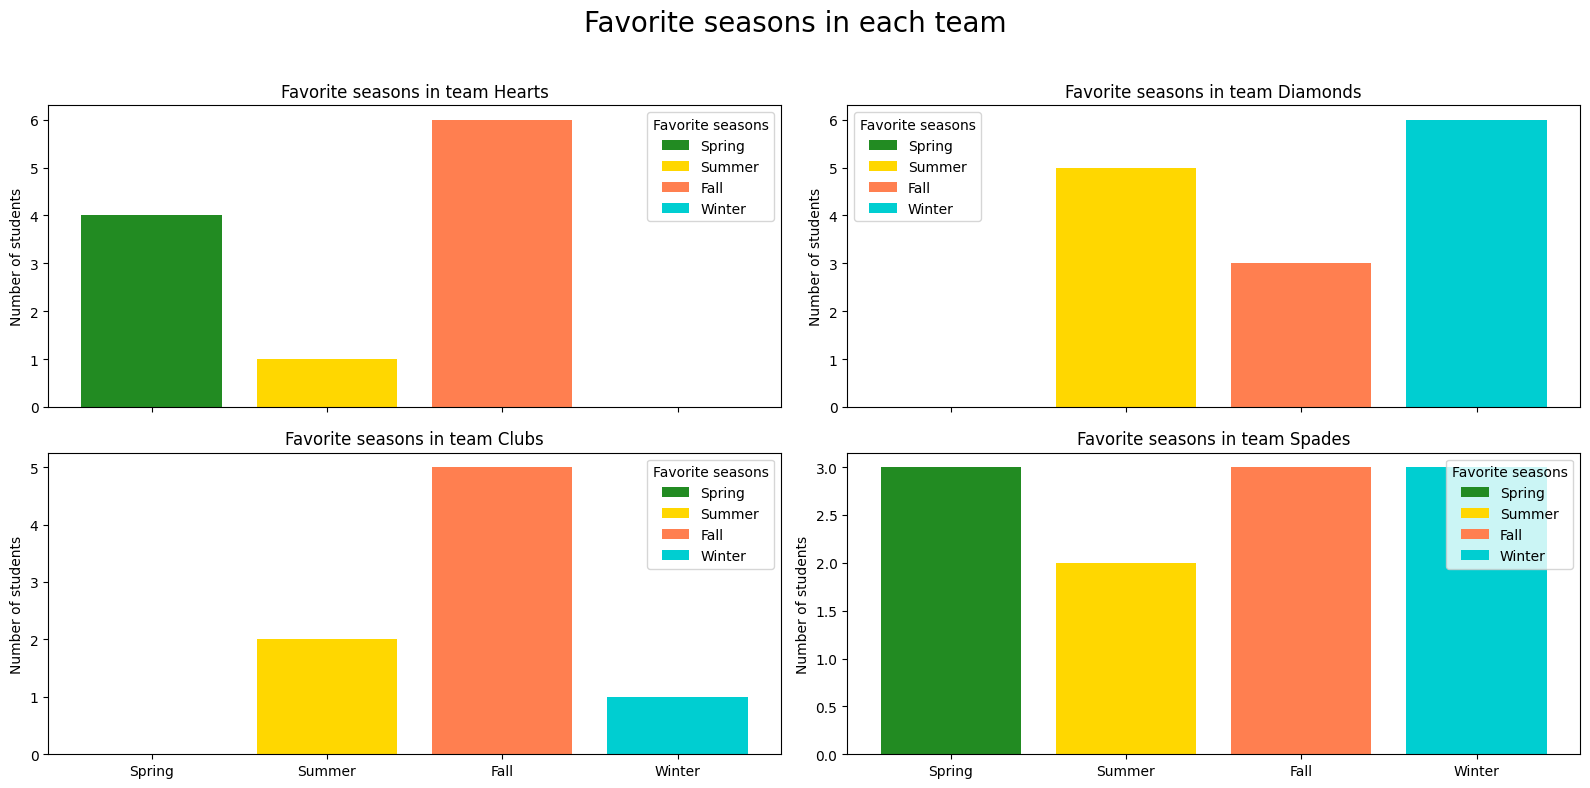

In [16]:
# Example usage
visualize_fav_season(data, card=card_list, target_col="fav_season", team_col="card_team", nrow=2, ncol=2)

- Percentage pie chart on biggest college fears

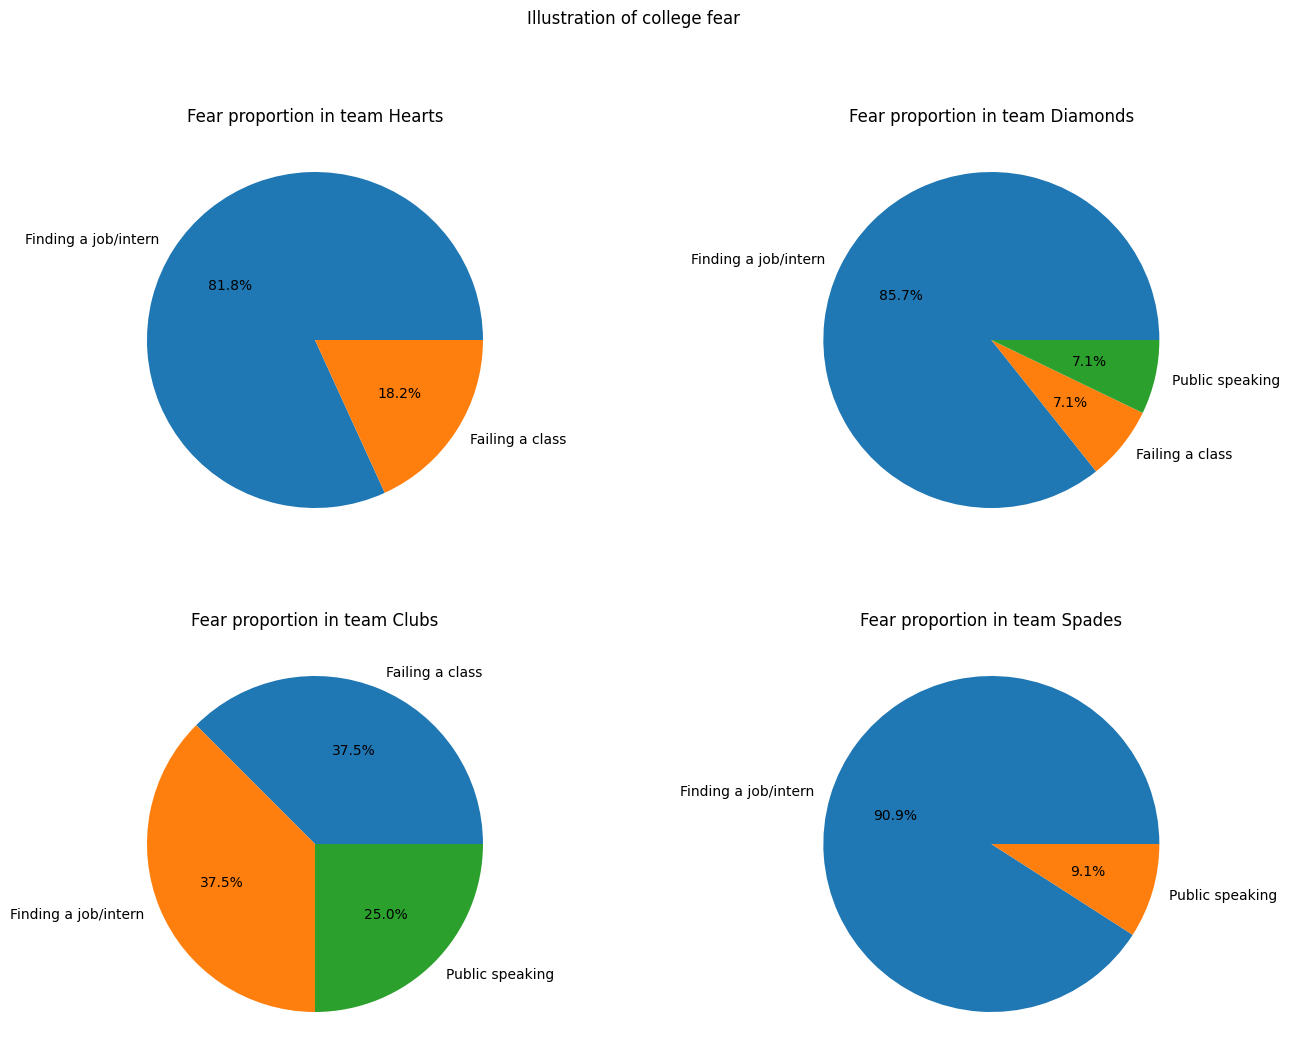

In [17]:
# What is the most common fear among your group, and what percentage of students share this fear?
visualize(data, card=card_list, target_col="big_college_fear", team_col="card_team", nrow=2, ncol=2)

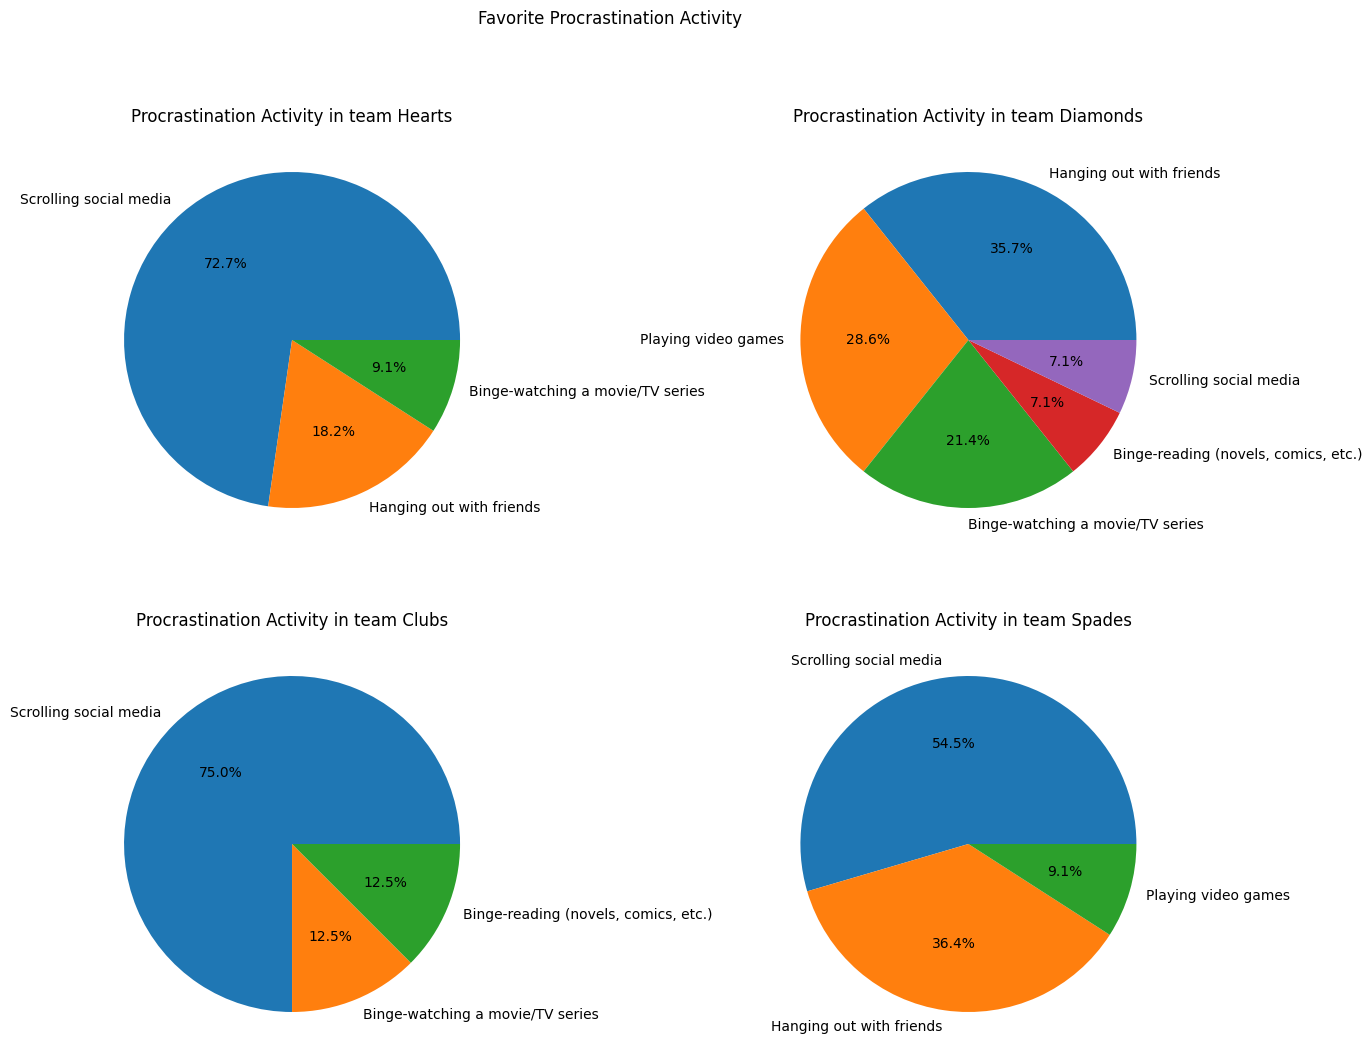

In [18]:
# What is the most popular way to procrastinate in your group, and what percentage of students prefer this method?
visualize(data, card=card_list, 
          target_col="fav_past_time", 
          team_col="card_team", 
          nrow=2, 
          ncol=2, 
          subtitle="Procrastination Activity in team", 
          title="Favorite Procrastination Activity")

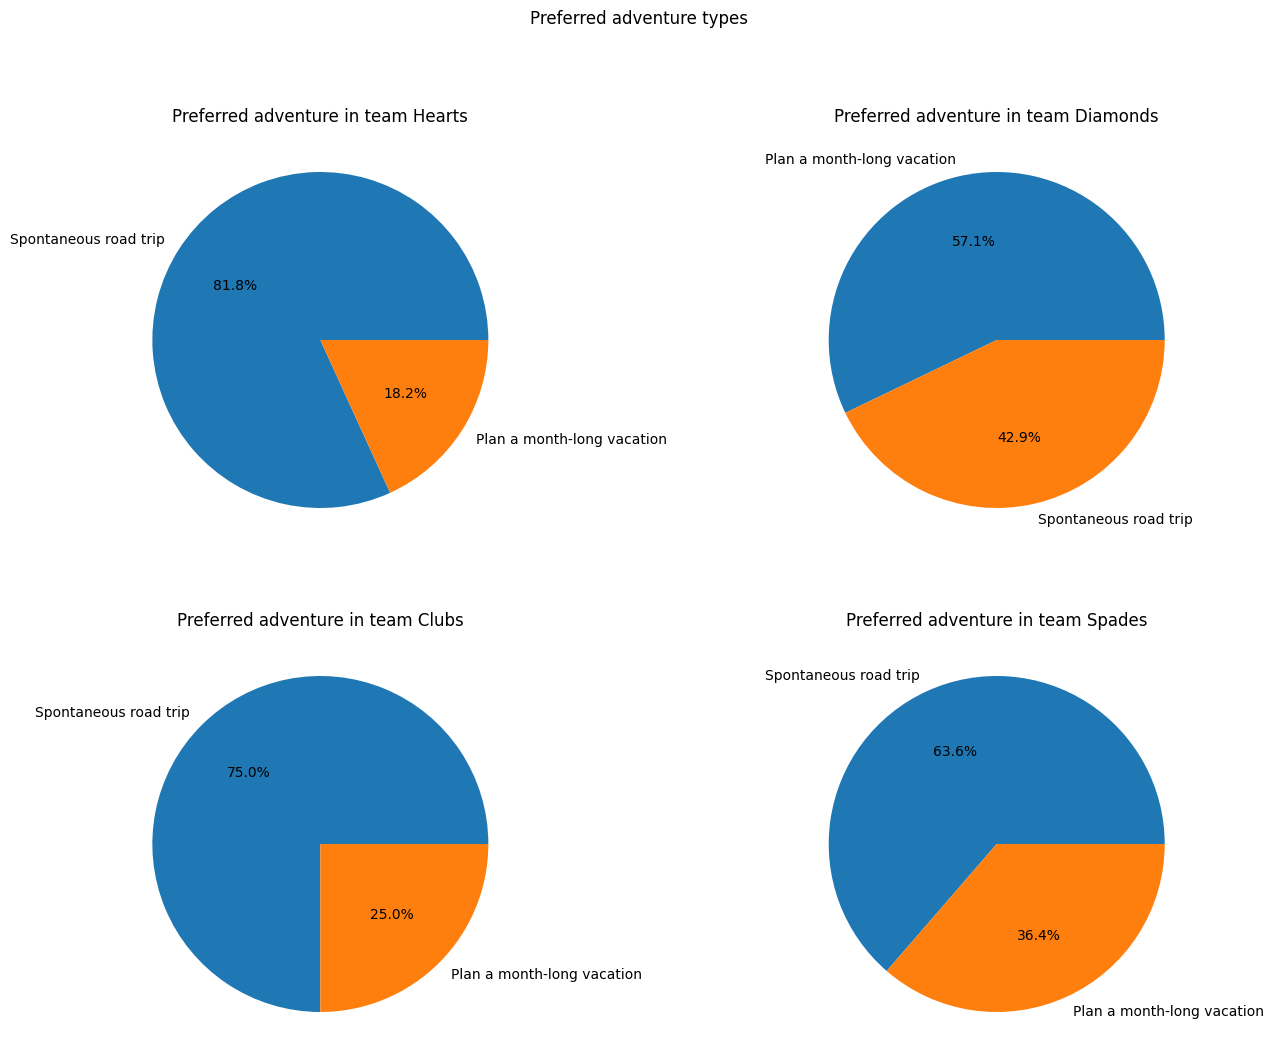

In [19]:
# What percentage of students in your group would rather take a spontaneous road trip than plan a month-long vacation? 
visualize(data, card=card_list, 
          target_col="roadtrip_vs_vacation", 
          team_col="card_team", 
          nrow=2, 
          ncol=2, 
          subtitle="Preferred adventure in team", 
          title="Preferred adventure types")